<a href="https://colab.research.google.com/github/valllllll2000/data-mining-alzheimer/blob/main/DataMiningAlzheimer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto para el curso de Data Mining en CodeOp

## Programa de la presentación

1. Presentarnos:

  Marie Coutart,

  Carolina Kaechele,

  Jocelyn Castro,

  Valeria Rogatchevskikh

2. Problematica y objectivos del proyecto

  * Predecir el Alzheimer teniendo datos clinicos del paciente como el MMSE (examen del estado mental), el CDR (Clasificación clinica de la demencia) y el volumen del cerebro.
  * Analizar el riesgo de patir Alzheimer segun ciertas factores socioeconomicos como: la edad, el nivel de educación, el nivel sociocultural.
  * Posibilidad de usar conclusiones para software de diagnostico

3. Resumir, descripcion de los datos y de la base de datos

Origen de los datos: Kaggle

Link: https://www.kaggle.com/datasets/brsdincer/alzheimer-features

Tamaño:
10 Columnas y ~373 lineas

Detalles de las columnas:

- **Grupo** --> Clase, posibles valores: Demented, Nondemented, Converted
- **Edad** --> Edad, de 60 a 98
- **EDUC** --> Años de Educación, de 6 a 23
- **SES** --> Estado Socioeconómico / 1 (Bajo) - 5 (Alto)
- **MMSE** --> Examen del Estado Mental Mínimo de 4 (Demencia severa) a 30 (Sin demencia)
- **CDR** --> Clasificación Clínica de Demencia de 0 (sin demencia) a 2 (con demencia)
- **eTIV** --> Volumen Intracraneal Total Estimado de 1106 a 2024
- **nWBV** --> Volumen Total del Cerebro Normalizado 0,64 a 0,84
- **ASF** --> Factor de Escalamiento del Atlas 0,88 a 1,59

#### 1. MMSE (Examen del Estado Mental Mínimo)
Evalua la función cognitiva (memoria, orientación, atención y lenguaje). La puntuación total varía de 0 a 30, una puntuación inferior a 24 sugiere posible demencia, cuanto más bajo peor es el estado de demencia.

####  2. CDR (Clasificación Clínica de Demencia)
Evalue la gravedad de la demencia basada en entrevistas y evaluaciones clínicas. Evalúa las habilidades cognitivas y funcionales en diferentes dominios.  
Varía de 0 (sin demencia) a 3 (demencia severa).

####  3. eTIV (Volumen Intracraneal Total Estimado)
Medida del volumen total dentro del cráneo, que incluye el cerebro, el líquido cefalorraquídeo y otras estructuras. Rango de 1,200 a 1,800 cm³ para adultos.  
- **Hombres:** de 1,400 a 1,600 cm³.  
- **Mujeres:** de 1,100 a 1,400 cm³.  
Puede haber variaciones individuales basadas en la edad, el sexo y la demografía de la población.

####  4. nWBV (Volumen Total del Cerebro Normalizado)
Representa el volumen total del cerebro normalizado por el volumen intracraneal total (eTIV). Ayuda a evaluar la atrofia cerebral, util para el estudio de enfermedades degenerativas. Porcentaje del volumen intracraneal total. Normalmente varía del 75% al 95% del eTIV.  
Un nWBV normal podría estar alrededor del 80% al 90%.
Los valores más bajos pueden indicar atrofia cerebral, común en condiciones como el Alzheimer.

####  5. ASF (Factor de Escalamiento del Atlas)
Un factor utilizado para escalar datos de neuroimagen a un atlas estándar, permitiendo comparaciones entre sujetos.

4. Limpieza de datos, explicar el porque y enseñar codigo
5. Analisis exploratorio:
  - Exploración de datos: mostrar datos con graficas, por ejemplo por edad, sexo, educacion
  - Mostrar las graficas outliers (Joselyn las tenia muy bien hechas)
  - Correlaciones?? kendall o otro?
  - Llegar a conclusiones
6. Mineria de datos:
  - Arbol de decision
  - Arbol de clasificacion y evaluar las metricas, validacion cruzada?
7. Evaluación del modelo y resultados
8. Crear presentación en Canva y añadir capturas??


Ideas de conclusiones:
* Educacion y posibilidad de tener Alzheimer
* Importancia del factor socio economico: si o no?
* Atrofia cerebral (nWBV)
* Edad


In [18]:
import pandas as pd

url = 'https://raw.githubusercontent.com/valllllll2000/data-mining-alzheimer/refs/heads/main/alzheimer.csv'
df = pd.read_csv(url)

#organizacion de los datos:
# Mostrar las primeras filas
print(df.head())
print('\n')

# Información general del dataset
print(df.info())
print('\n')

# Estadísticas generales
print(df.describe())
print('\n')

         Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0  Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1  Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
2     Demented   M   75    12  NaN  23.0  0.5  1678  0.736  1.046
3     Demented   M   76    12  NaN  28.0  0.5  1738  0.713  1.010
4     Demented   M   80    12  NaN  22.0  0.5  1698  0.701  1.034


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage:

Conclusion: aqui podemos ver las columnas y filas y vemos que en las columnas SES y MMSE faltan datos para algunas filas (los datos son nulos).

In [25]:
# Limpieza de datos
# Rellenamos con la mediana para las columnas MMSE y SES
# para MMSE rellenamos con la mediana que corresponde al grupo
df['MMSE'] = df.groupby('Group')['MMSE'].transform(lambda x: x.fillna(x.median()))
df['SES'] = df['SES'].fillna(df['SES'].median())

# Resumen del dataset
print(df.info())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     373 non-null    float64
 5   MMSE    373 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB
None




La columna Group tiene posibles valores de 'Demented' (Con demencia), 'Nondemented' (sin demencia) y 'Converted'. Para poder decidir que significa 'Converted' hemos hecho el siguiente analisis:

In [26]:
# Calucular medias para comparar los valores significativos del Alzheimer y entender mejor la columna 'Converted'
mmse_media = df.groupby('Group')['MMSE'].mean()
display(mmse_media)
cdr_media = df.groupby('Group')['CDR'].mean()
display(cdr_media)
nWBV_media = df.groupby('Group')['nWBV'].mean()
display(nWBV_media)
ASF_media = df.groupby('Group')['ASF'].mean()
display(ASF_media)

,MMSE
Group,
Converted,28.675676
Demented,24.575342
Nondemented,29.226316


,CDR
Group,
Converted,0.256757
Demented,0.671233
Nondemented,0.005263


,nWBV
Group,
Converted,0.723730
Demented,0.716301
Nondemented,0.740900


,ASF
Group,
Converted,1.212405
Demented,1.196890
Nondemented,1.191063


Conclusiones: los datos no permiten determinar con seguridad si la clase 'Converted' se refiere a personas que han pasado de sanos a dementes o al revés, en la base de datos original no hay ninguna información sobre ello y por eso para nuestro analisis decidimos borrar (limpiar) estos datos.

In [28]:
# Limpiamos las filas que contienen Converted
df = df[df['Group'] != 'Converted']
print(df.info())

print('\n')

<class 'pandas.core.frame.DataFrame'>
Index: 336 entries, 0 to 372
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Group      336 non-null    object  
 1   M/F        336 non-null    object  
 2   Age        336 non-null    int64   
 3   EDUC       336 non-null    int64   
 4   SES        336 non-null    float64 
 5   MMSE       336 non-null    float64 
 6   CDR        336 non-null    float64 
 7   eTIV       336 non-null    int64   
 8   nWBV       336 non-null    float64 
 9   ASF        336 non-null    float64 
 10  Age_Group  334 non-null    category
dtypes: category(1), float64(5), int64(3), object(2)
memory usage: 29.4+ KB
None




Age Median:  76.0
EDUC Median:  14.0
SES Median:  2.0
MMSE Median:  29.0
CDR Median:  0.0
eTIV Median:  1475.0
nWBV Median:  0.731
ASF Median:  1.19




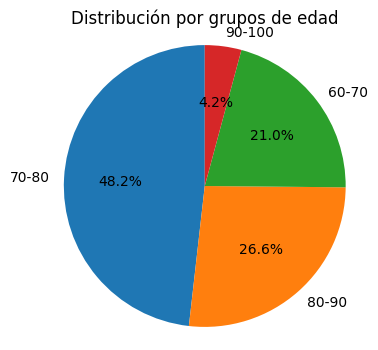

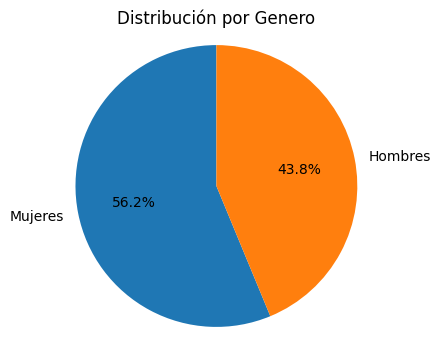

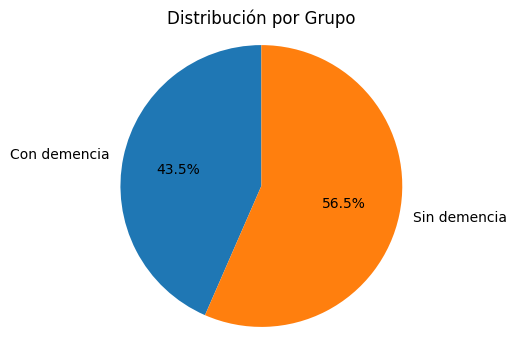



Numero de pacientes por genero
M/F
F    189
M    147
Name: count, dtype: int64




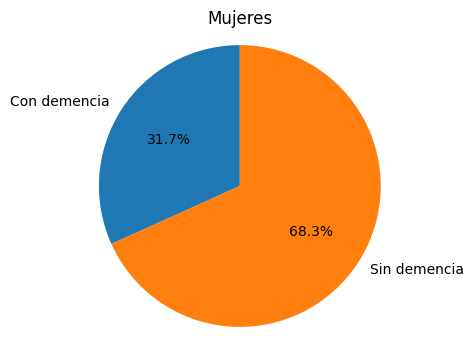

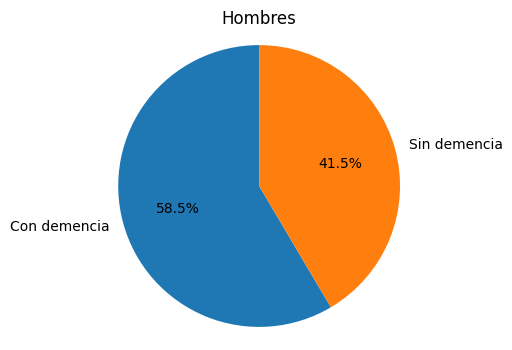

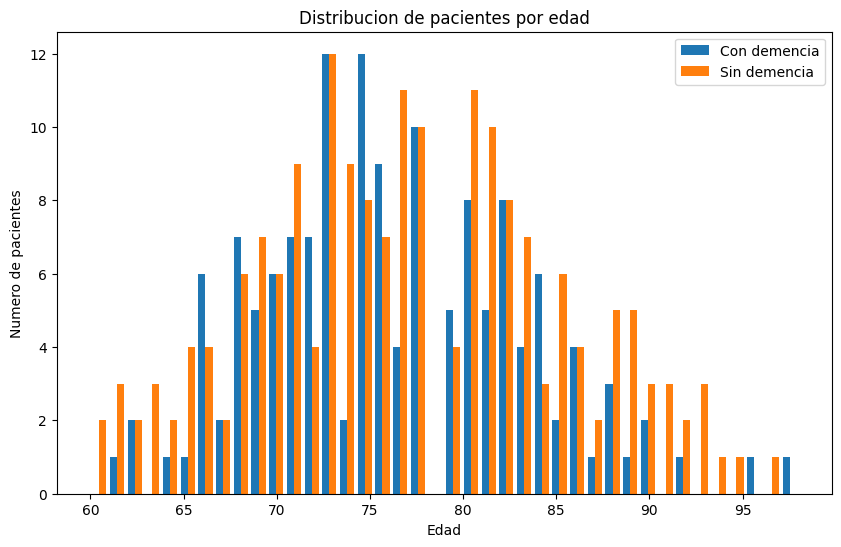

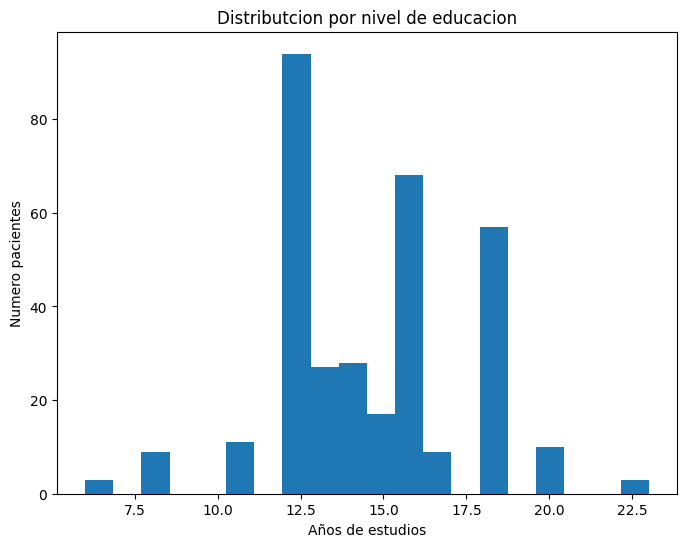

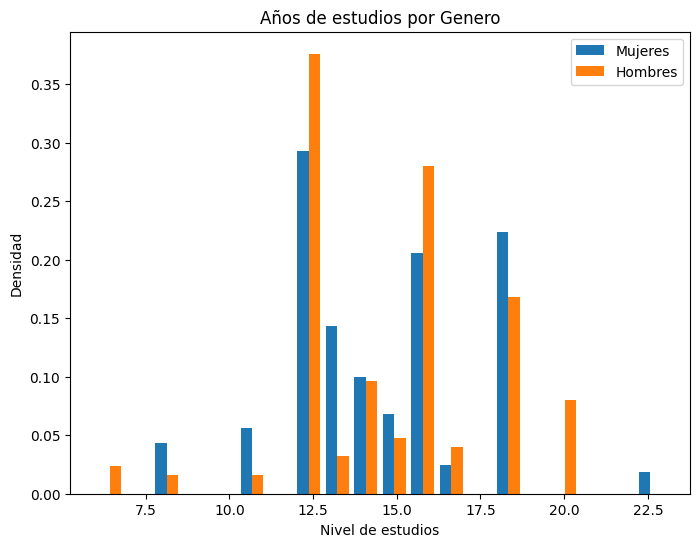

In [40]:
import matplotlib.pyplot as plt
# Exploracion, graficos...
# Calculo medianas
print('Age Median: ', df['Age'].median())
print('EDUC Median: ', df['EDUC'].median())
print('SES Median: ', df['SES'].median())
print('MMSE Median: ', df['MMSE'].median())
print('CDR Median: ', df['CDR'].median())
print('eTIV Median: ', df['eTIV'].median())
print('nWBV Median: ', df['nWBV'].median())
print('ASF Median: ', df['ASF'].median())
print("\n")

def create_pie_chart(group_counts, labels, title):
    """
    Crea un grafico pastel con las etiquetas y el título especificados.

    Args:
        group_counts: Una lista o Serie que contiene los datos para el gráfico de pastel.
        labels: Una lista de etiquetas para las porciones del pastel.
        title: El título del gráfico de pastel.
    """
    plt.figure(figsize=(4, 4))
    plt.pie(group_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.axis('equal') # Equal asegura que el pastel se dibuje como un círculo.
    plt.show()
    print("\n")


# Por edad
age_bins = [60, 70, 80, 90, 100]
age_labels = ['60-70', '70-80', '80-90', '90-100']

# Nueva columna con groupos de edad
df.loc[:, 'Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Contar totales por cada groupo de edad
age_group_counts = df['Age_Group'].value_counts()

# Crear grafico
create_pie_chart(age_group_counts, age_group_counts.index, 'Distribución por grupos de edad')

# borrar columna por edad
df = df.drop('Age_Group', axis=1)

# Contar ocorrencias por genero
gender_group_count = df['M/F'].value_counts()

# Crear grafico
create_pie_chart(gender_group_count, ['Mujeres', 'Hombres'], 'Distribución por Genero')

# Contar ocorrencias por grupo (Demented y Nondemented)
group_counts = df['Group'].value_counts()
group_counts = group_counts.sort_index()

# Crear grafico
create_pie_chart(group_counts,['Con demencia', 'Sin demencia'], 'Distribución por Grupo')

# Count the occurrences of each gender
gender_counts = df['M/F'].value_counts()

# Print the counts
print("Numero de pacientes por genero")
print(gender_counts)
print("\n")

# Count the occurrences of each group for women
women = df[df['M/F'] == 'F']
group_counts_women = women['Group'].value_counts()
group_counts_women = group_counts_women.sort_index()

# Crear grafico
create_pie_chart(group_counts_women,['Con demencia', 'Sin demencia'], 'Mujeres')

# Count the occurrences of each group for men
men = df[df['M/F'] == 'M']
group_counts_men = men['Group'].value_counts()
group_counts_men = group_counts_men.sort_index()

# Crear grafico
create_pie_chart(group_counts_men,['Con demencia', 'Sin demencia'], 'Hombres')

demented_data = df[df['Group'] != 'Nondemented']['Age']
non_demented_data = df[df['Group'] == 'Nondemented']['Age']

# Crear histograma
plt.figure(figsize=(10, 6))
plt.hist([demented_data, non_demented_data], bins=40, label=['Con demencia', 'Sin demencia'])
plt.title('Distribucion de pacientes por edad')
plt.xlabel('Edad')
plt.ylabel('Numero de pacientes')
plt.legend()
plt.show()
print('\n')

plt.figure(figsize=(8, 6))
plt.hist(df['EDUC'], bins=20)
plt.title('Distributcion por nivel de educacion')
plt.xlabel('Años de estudios')
plt.ylabel('Numero pacientes')
plt.show()
print('\n')

women_education = df[df['M/F'] == 'F']['EDUC']
men_education = df[df['M/F'] == 'M']['EDUC']
plt.figure(figsize=(8, 6))
# Como hay más mujeres que hombres en el conjunto de datos adaptamos los datos usando la densidad
# se está comparando la proporción de hombres y mujeres en cada nivel de estudios, en lugar del número absoluto
plt.hist([women_education, men_education], bins=20, density=True, label=['Mujeres', 'Hombres'])
plt.legend()
plt.title('Años de estudios por Genero')
plt.xlabel('Nivel de estudios')
plt.ylabel('Densidad')
plt.show()
print('\n')

# Outliers

In [ ]:
# Select numerical features for outlier analysis
df_numerico = df[['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]

# Calculate statistics
media = df_numerico.mean()
mediana = df_numerico.median()
moda = df_numerico.mode().iloc[0]

# Now you can print or use these statistics as needed
print("Mean:\n", media)
print("\nMedian:\n", mediana)
print("\nMode:\n", moda)


Mean:
 Age       77.013405
EDUC      14.597855
SES        2.460452
MMSE      27.342318
CDR        0.290885
eTIV    1488.128686
nWBV       0.729568
ASF        1.195461
dtype: float64

Median:
 Age       77.000
EDUC      15.000
SES        2.000
MMSE      29.000
CDR        0.000
eTIV    1470.000
nWBV       0.729
ASF        1.194
dtype: float64

Mode:
 Age       73.000
EDUC      12.000
SES        2.000
MMSE      30.000
CDR        0.000
eTIV    1475.000
nWBV       0.696
ASF        1.184
Name: 0, dtype: float64
